In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from ShAReD_Net.configure import config

cam_transform = config.dataset.cam_transform
inverse_cam_transforme = config.dataset.inverse_cam_transforme


config.dataset.IMG_PATH = "/dataset/jta/images_jpg"
config.dataset.ANNO_PATH = "/dataset/jta/new_image_annotations"

config.checkpoint.path = "/tf/pose3D/checkpoints"
config.tensorboard.path = "/tf/pose3D/logdir"



In [3]:
#TODO TEST
print(tf.matmul(cam_transform, inverse_cam_transforme))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [4]:
data_split = "train"

In [5]:
cut_dist = 10

In [6]:
import ShAReD_Net.data.transform.transform as transform

In [7]:
img_poses_ds = config.dataset.create_dataset(data_split)

img_poses_poss_ds = transform.create_img_poses_poss_dataset(img_poses_ds)
imgcut_poses_poss_ds = transform.create_imgcut_poses_poss_dataset(img_poses_poss_ds, cut_dist)
imgcut_imgposes_imgposs_ds = transform.create_imgcut_imgposes_imgposs_dataset(imgcut_poses_poss_ds)
imgcut_cutposes_cutposs_ds = transform.create_imgcut_cutposes_cutposs_dataset(imgcut_imgposes_imgposs_ds, cut_dist)
crop_ds = transform.create_croped_dataset(imgcut_cutposes_cutposs_ds)
filtered_cutposes_cutposs_ds = transform.create_filtered_cutposes_cutposs_dataset(crop_ds)
imgcut_cutposes_cutposs_heatmap_indices_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_dataset(filtered_cutposes_cutposs_ds, cut_dist)
imgcut_cutposes_cutposs_heatmap_indices_weights_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_ds)
imgcut_relposes_roiindices_heatmap_indices_weights_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_weights_ds, cut_dist)
imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_ds)
batchable_ds = transform.create_batchable_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds)



Roi_Extractor [TensorShape([1, None, None, 3]), TensorShape([None, 3])]


In [16]:
take = imgcut_cutposes_cutposs_ds.take(1)
op = tf.data.experimental.get_next_as_optional(iter(imgcut_cutposes_cutposs_ds))
op.get_value()


(<tf.Tensor: shape=(466, 829, 3), dtype=float32, numpy=
 array([[[0.23232606, 0.2102249 , 0.19846019],
         [0.23498023, 0.20257756, 0.18442309],
         [0.2514329 , 0.2050554 , 0.17973419],
         ...,
         [0.160738  , 0.19219731, 0.21348292],
         [0.14720577, 0.16847582, 0.19200525],
         [0.        , 0.        , 0.        ]],
 
        [[0.26573145, 0.24363029, 0.23186557],
         [0.24896139, 0.21655875, 0.19840427],
         [0.25066075, 0.20428324, 0.178962  ],
         ...,
         [0.14673598, 0.17819531, 0.19948088],
         [0.15207396, 0.17334402, 0.19687346],
         [0.        , 0.        , 0.        ]],
 
        [[0.2793406 , 0.25723946, 0.24547474],
         [0.2624887 , 0.23008604, 0.21193157],
         [0.24749655, 0.20111904, 0.17579783],
         ...,
         [0.14310233, 0.17456166, 0.19584721],
         [0.15943073, 0.18070078, 0.20423019],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.18421948, 0.12649794

In [24]:
tf.data.experimental.get_single_element(take)


(<tf.Tensor: shape=(466, 829, 3), dtype=float32, numpy=
 array([[[0.8431374 , 0.8666668 , 0.8666668 ],
         [0.8431373 , 0.8666667 , 0.8666667 ],
         [0.8431373 , 0.86666673, 0.86666673],
         ...,
         [0.42849284, 0.45706576, 0.53157556],
         [0.44726217, 0.47471315, 0.54922295],
         [0.        , 0.        , 0.        ]],
 
        [[0.8431373 , 0.8666668 , 0.8666668 ],
         [0.8431372 , 0.8666667 , 0.8666667 ],
         [0.84313726, 0.86666673, 0.86666673],
         ...,
         [0.43145704, 0.46002993, 0.5337329 ],
         [0.4459509 , 0.4734019 , 0.54678154],
         [0.        , 0.        , 0.        ]],
 
        [[0.84313726, 0.8666667 , 0.8666667 ],
         [0.8431372 , 0.8666666 , 0.8666666 ],
         [0.8431372 , 0.8666667 , 0.8666667 ],
         ...,
         [0.43418974, 0.4654188 , 0.5350933 ],
         [0.4431255 , 0.47128382, 0.5415303 ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.81170934, 0.77149904

In [19]:
cutdist_ds = transform.create_cutdist_dataset()
interleaved_multiscale_ds = transform.create_dataset(data_split, 2)

tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32)


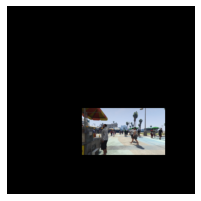

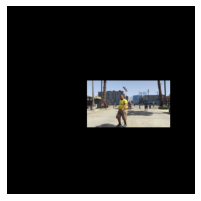

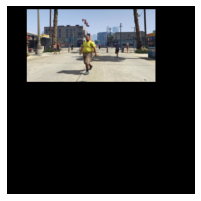

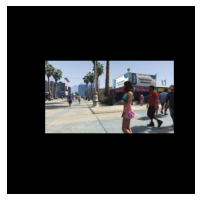

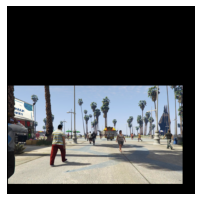

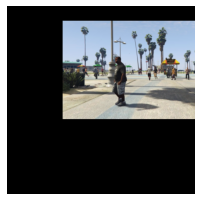

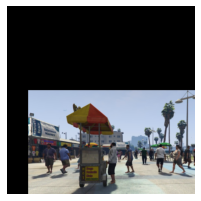

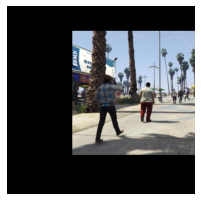

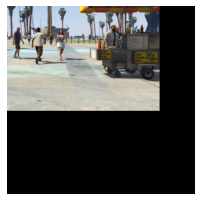

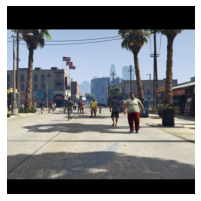

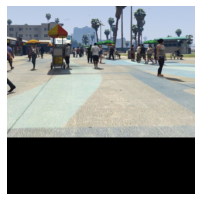

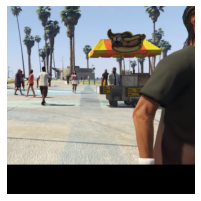

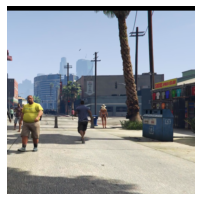

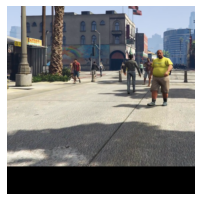

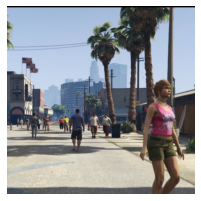

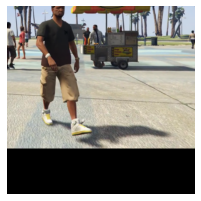

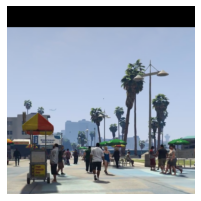

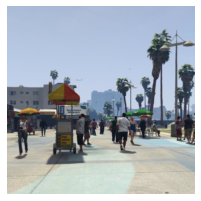

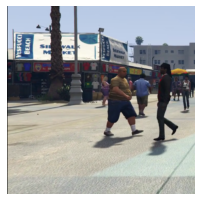

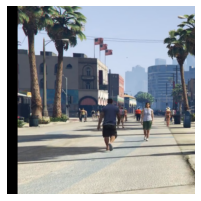

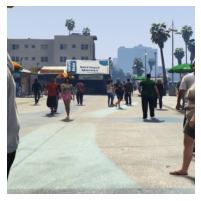

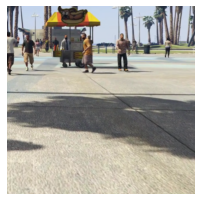

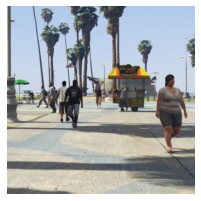

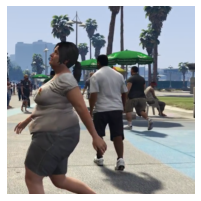

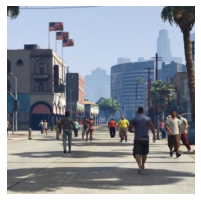

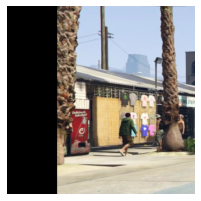

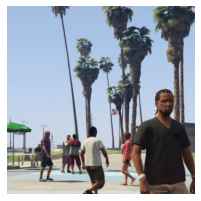

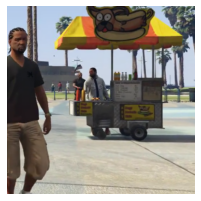

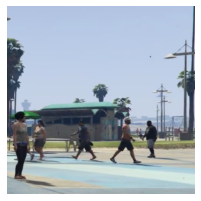

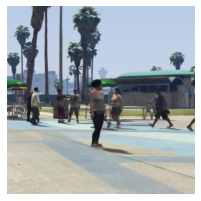

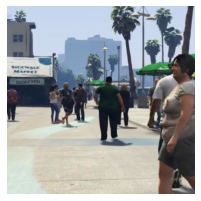

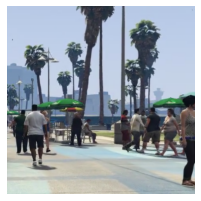

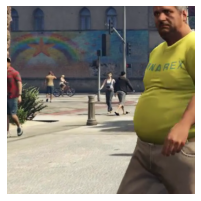

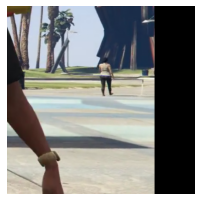

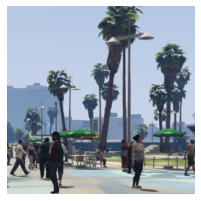

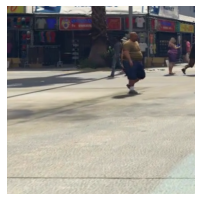

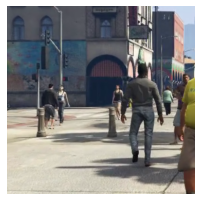

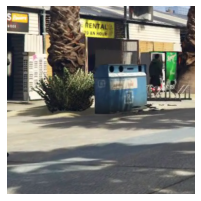

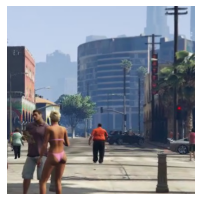

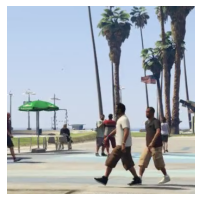

In [9]:
def show_img(image):
    print(tf.shape(image))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    plt.axis('off')


for img, (heatmap, weights), roi_indexes, (rel_pose, pose_indexes) in interleaved_multiscale_ds.take(40):
    show_img(img)
    

tf.Tensor([466 829   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)
[322.985595703125,218.7097625732422]
[322.93798828125,223.47068786621094]
[323.0266418457031,250.10157775878906]
[333.1012268066406,226.41688537597656]
[312.16864013671875,226.8253173828125]
[338.5765380859375,237.93617248535156]
[305.7479248046875,237.58975219726562]
[336.17755126953125,244.88668823242188]
[300.37738037109375,249.4649658203125]
[327.9507141113281,253.9536590576172]
[318.1863708496094,253.9738006591797]
[328.73779296875,273.1216125488281]
[316.5990295410156,270.23284912109375]
[328.0077819824219,290.66064453125]
[315.64306640625,288.9789733886719]
[322.08355712890625,249.7305908203125]


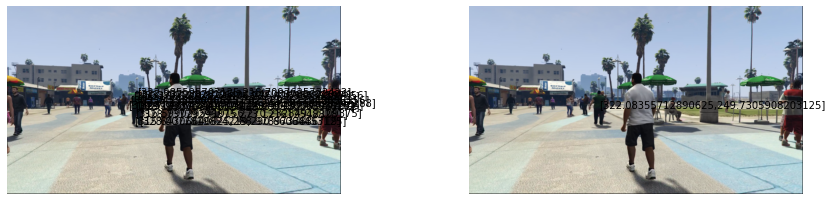

In [10]:
#TODO TEST CODE
#TEST
imgcut_cutposes_cutposs_ds_take = imgcut_cutposes_cutposs_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

tf.Tensor([409 409   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)
tf.Tensor([409 409   3], shape=(3,), dtype=int32) tf.Tensor([2 3], shape=(2,), dtype=int32) tf.Tensor([ 2 15  3], shape=(3,), dtype=int32)


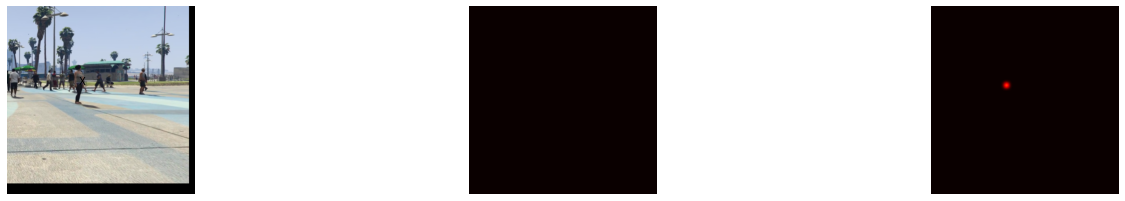

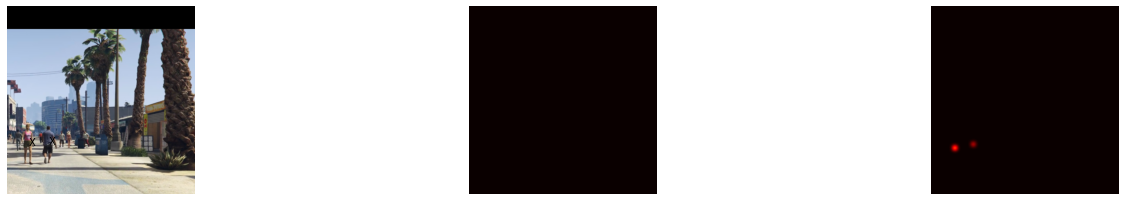

In [11]:
#TODO TEST CODE
#TEST

def show_img_and_hm(image, heatmap):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic")
    plt.axis('off')

    ax = plt.subplot(5,5,3)
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic")
    plt.axis('off')

for i in range(2):
    imgcut_cutposes_cutposs_heatmap_ds_take = imgcut_cutposes_cutposs_heatmap_indices_ds.take(1)
    img, poses, poss, heatmap, indix = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_ds_take)
    show_img_and_hm(img, heatmap)

tf.Tensor([409 409   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)


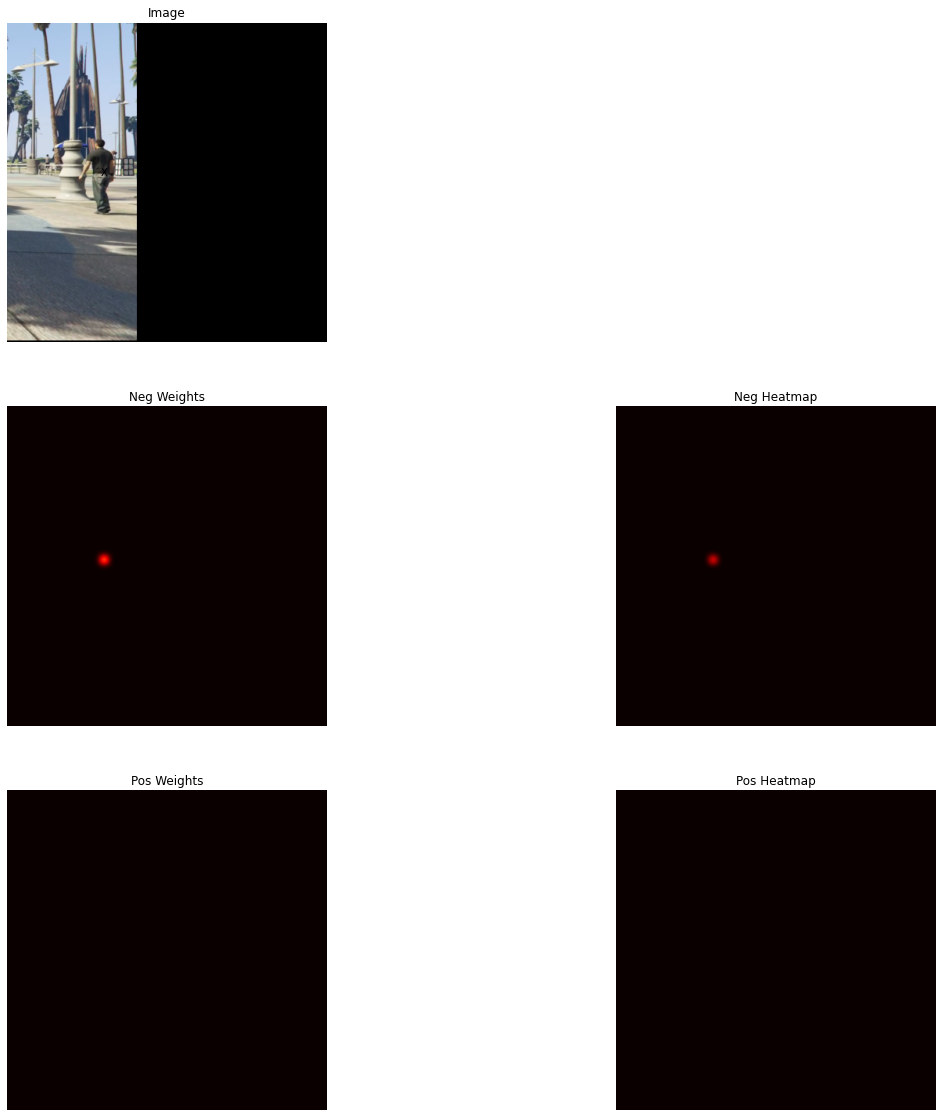

In [12]:
#TODO TEST CODE
#TEST

def show_img_and_hm_w(image, heatmap, weights):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(20,20))

    ax = plt.subplot(3,2,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.title('Image')
    plt.axis('off')

    ax = plt.subplot(3,2,3)
    plt.imshow(weights[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.title('Neg Weights')
    plt.axis('off')

    ax = plt.subplot(3,2,4)
    plt.title('Neg Heatmap')
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,5)
    plt.title('Pos Weights')
    plt.imshow(weights[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,6)
    plt.title('Pos Heatmap')
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

imgcut_cutposes_cutposs_heatmap_weights_ds_take = imgcut_cutposes_cutposs_heatmap_indices_weights_ds.take(1)
img, poses, poss, heatmap, index, weights = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_weights_ds_take)
show_img_and_hm_w(img, heatmap, weights)

Roi_Extractor [TensorShape([1, 409, 409, 3]), TensorShape([1, 3])]
(1, 103, 103, 3)
[53.285064697265625,20.894638061523438]
[54.803466796875,26.310928344726562]
[52.8388671875,53.324676513671875]
[54.691741943359375,30.807052612304688]
[56.465179443359375,30.156112670898438]
[54.467498779296875,43.28131103515625]
[57.215301513671875,43.72404479980469]
[49.151580810546875,54.79484558105469]
[52.8616943359375,55.451690673828125]
[53.24334716796875,56.56910705566406]
[52.922515869140625,56.959930419921875]
[53.55328369140625,75.76318359375]
[53.2821044921875,76.90716552734375]
[54.33917236328125,95.17935180664062]
[54.68505859375,97.90762329101562]


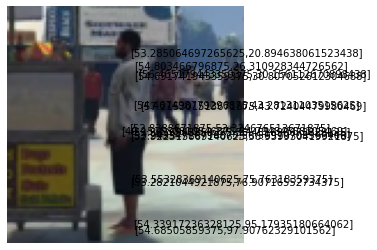

In [13]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

img_poses = relposes[:,:,:-1] + roi_size/2

show_img_and_hm_w(pose_imges, img_poses)

Roi_Extractor [TensorShape([1, 409, 409, 3]), TensorShape([1, 3])]
(1, 103, 103, 3)
[52,24]
[50,28]
[52,56]
[62,32]
[40,32]
[66,42]
[36,44]
[70,54]
[40,48]
[56,58]
[48,60]
[54,74]
[46,80]
[52,94]
[50,94]


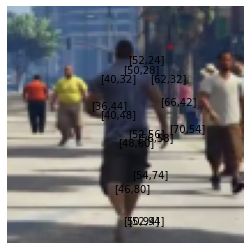

In [27]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights, pose_indexes = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

pose_indexes = pose_indexes[...,::-1] * config.model.img_downsampling

show_img_and_hm_w(pose_imges, pose_indexes)

In [15]:
roi_size = config.model.roi_size
img_downsampling = config.model.img_downsampling

image_crop_size = np.asarray(roi_size) * img_downsampling * 2 + 1
roi_extractor = slim_modules.Roi_Extractor(roi_size=image_crop_size)



def random_crop(imgcut, poses_cut, poss_cut):
    imgcut_batched = imgcut[None,...]
    offset_size = tf.cast(min(image_crop_size), tf.float32) / 3
    offsets = tf.random.uniform(tf.shape(poss_cut), minval=-offset_size, maxval=offset_size, dtype=tf.dtypes.float32)

    cut_index = tf.cast(poss_cut + offsets, tf.int32)[...,::-1]

    mask = tf.constant([[0, 1, 1]], tf.int32)

    cut_index = cut_index * mask

    pose_imges = roi_extractor([imgcut_batched, cut_index])

    poses = tf.repeat(poses_cut[None,...], tf.shape(cut_index)[0], axis=0)
    poss = tf.repeat(poss_cut[None,...], tf.shape(cut_index)[0], axis=0)

    center = tf.constant([[image_crop_size[1]//2, image_crop_size[0]//2, 0]], tf.float32)
    cut_pos = tf.cast(cut_index[...,::-1], tf.float32) - center
    cut_pos_poses = cut_pos[:,None,None,:]
    cut_pos_poss = cut_pos[:,None,:]

    new_poses = poses - cut_pos_poses
    new_poss = poss - cut_pos_poss


    dataset = tf.data.Dataset.from_tensor_slices((pose_imges, new_poses, new_poss))

    return dataset

def filter_poss_and_pose_crop_size(image, poses, poss):
    image_size = tf.cast(tf.shape(image)[0:2], poss.dtype)
    
    indexes = tf.where(tf.math.logical_and(
        tf.math.logical_and(poss[:,0] >= 0, poss[:,0] < image_size[1] - 1),
        tf.math.logical_and(poss[:,1] >= 0, poss[:,1] < image_size[0] - 1)))
    filtered_poss = tf.gather_nd(poss, indexes)
    filtered_poses = tf.gather_nd(poses, indexes)

    # for each keypoint filter person not fully in image
    for k in range(15):
        indexes = tf.where(tf.math.logical_and(
            tf.math.logical_and(filtered_poses[:,k,0] >= 0, filtered_poses[:,k,0] < image_size[1] - 1),
            tf.math.logical_and(filtered_poses[:,k,1] >= 0, filtered_poses[:,k,1] < image_size[0] - 1)))
        
        filtered_poss = tf.gather_nd(filtered_poss, indexes)
        filtered_poses = tf.gather_nd(filtered_poses, indexes)

    return image, filtered_poses, filtered_poss 

def create_croped_dataset(dataset):
    croped_ds = dataset.flat_map(random_crop)
    filtered_ds = croped_ds.map(filter_poss_and_pose_crop_size)
    return filtered_ds

Roi_Extractor [TensorShape([1, None, None, 3]), TensorShape([None, 3])]
tf.Tensor([205 205   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)
[82.7686767578125,111.31477355957031]
[83.36529541015625,117.23678588867188]
[82.59539794921875,141.09288024902344]
[75.07427978515625,120.71235656738281]
[90.89385986328125,121.68539428710938]
[72.61123657226562,133.52023315429688]
[93.5516357421875,134.12078857421875]
[69.5177001953125,144.93212890625]
[94.69891357421875,145.79037475585938]
[78.31610107421875,144.51812744140625]
[87.39996337890625,144.14065551757812]
[77.40985107421875,166.6181640625]
[84.929443359375,165.82730102539062]
[78.8294677734375,176.48617553710938]
[81.701171875,184.97817993164062]
[82.2135009765625,143.510986328125,10.077333450317383]


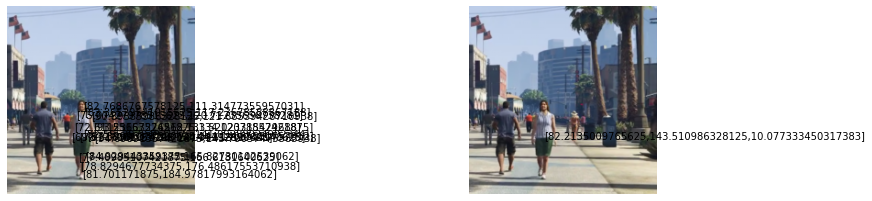

In [16]:
#TODO TEST CODE
#TEST
crop_ds = create_croped_dataset(imgcut_cutposes_cutposs_ds)

imgcut_cutposes_cutposs_ds_take = crop_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]},{pos[2]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

In [17]:
imgcut_relposes_roiindices_heatmap_indices_weights_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_ds_take)

pose_arr = tf.TensorArray(size=0,dtype=tf.float32,dynamic_size=True)
i = 0
for imgcut, relposes, roiindices, heatmap, indices, weights in imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1000):
    for img_pose in relposes:
        for joint in img_pose:
            pose_arr = pose_arr.write(i,joint)
            i+=1
            
agg_poses = pose_arr.stack()

(array([ 2., 38., 65., 81., 63., 29., 49., 61., 85., 27.]),
 array([-0.9899998 , -0.7709998 , -0.55199987, -0.33299989, -0.11399994,
         0.10500002,  0.32399997,  0.5429999 ,  0.7619999 ,  0.9809998 ,
         1.1999998 ], dtype=float32),
 <a list of 10 Patch objects>)

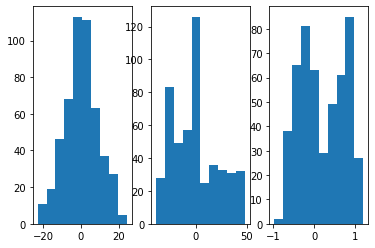

In [18]:
ax = plt.subplot(1,3,1)
plt.hist(agg_poses[:500,0])
ax = plt.subplot(1,3,2)
plt.hist(agg_poses[:500,1])
ax = plt.subplot(1,3,3)
plt.hist(agg_poses[:500,2])

In [19]:
meanp = tf.reduce_mean(tf.abs(agg_poses),axis=[0])
print(meanp)
maxp = tf.reduce_max(agg_poses,axis=[0])
print(maxp)
minp = tf.reduce_min(agg_poses,axis=[0])
print(minp)

tf.Tensor([ 7.2085485 18.16883    0.4882626], shape=(3,), dtype=float32)
tf.Tensor([30.579529  52.728363   1.1999998], shape=(3,), dtype=float32)
tf.Tensor([-32.463257  -41.360428   -1.1999998], shape=(3,), dtype=float32)


In [20]:
import ShAReD_Net.data.transform.inverse_transform as inverse_transform

uncut_ds = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)

In [21]:
#TODO TEST test if uncut_ds == cam_ds
take_uncut = uncut_ds.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_uncut)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)


uncut poss, poses [[1359.30408 721.591553 10.3766661]] [[[1356.52393 629.289429 10.45]
  [1357.27637 642.988037 10.4]
  [1359.58911 719.796936 10.34]
  ...
  [1345.17285 787.755554 10.27]
  [1371.43262 835.372498 10.47]
  [1350.63184 842.846863 10.09]]]


In [22]:
real_ds1 = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)
real_ds2 = inverse_transform.create_uncut_dataset(uncut_ds)

In [23]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds1.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

uncut poss, poses [[1060.03406 731.243347 9.76266575]] [[[1059.25037 634.997437 9.77]
  [1058.67175 651.197327 9.73]
  [1058.81677 732.959534 9.74]
  ...
  [1072.49255 789.467041 9.99]
  [1024.63867 856.514404 9.41]
  [1089.86414 842.349243 10.12]]]


In [24]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds2.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

uncut poss, poses [[472.163361 732.106 9.09133434]
 [1316.15308 720.316223 9.94466782]] [[[469.859344 623.874207 9.06]
  [473.86142 641.559387 9.09]
  [474.659302 729.082397 9.1]
  ...
  [484.238464 804.41217 9.06]
  [471.560547 848.512329 9.26]
  [487.335938 868.211243 9.14]]

 [[1318.19312 625.388062 9.92]
  [1323.65588 641.540222 9.95]
  [1318.93286 719.962402 9.98]
  ...
  [1328.66675 789.045471 9.9]
  [1279.21643 844.955139 10.05]
  [1328.95642 845.976074 9.99]]]
uncut poss, poses [[1366.91296 2119.44678 9.09133434]
 [3810.26318 2085.31543 9.94466782]] [[[1360.2428 1806.11572 9.06]
  [1371.82874 1857.31433 9.09]
  [1374.13879 2110.6936 9.1]
  ...
  [1401.87036 2328.77319 9.06]
  [1365.16785 2456.44312 9.26]
  [1410.83752 2513.47168 9.14]]

 [[3816.16895 1810.49841 9.92]
  [3831.98364 1857.25891 9.95]
  [3818.31055 2084.29102 9.98]
  ...
  [3846.49023 2284.28662 9.9]
  [3703.33154 2446.14526 10.05]
  [3847.32886 2449.10083 9.99]]]


In [25]:
#before augmentation
cache(filename='')
repeat(-1)
shuffle(100)


#batch
batch(8)

#before input
prefetch(20)

take(steps)



NameError: name 'cache' is not defined